In [13]:
# -- 1. Load the dataset -- #
import tensorflow as tf
from tensorflow.keras import Input, layers, models
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

# Display the first few rows of the dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
# -- 2. Perform basic data analysis -- #
# Check for missing values
print(data.isnull().sum())

# Display basic statistics
print(data.describe())

# Check the distribution of the target variable
print(data['Outcome'].value_counts())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedig

In [4]:
# -- PREPROCESSING -- #

In [5]:
# -- 1. Feature scaling -- #
from sklearn.preprocessing import MinMaxScaler

# Separate features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# -- 2. Splitting the dataset -- #
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# -- IMPLEMENTATION -- #

In [15]:
# -- 1. Build the neural network -- #
# Build the neural network model
model = models.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),  # First hidden layer
    layers.Dense(32, activation='relu'),  # Second hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [16]:
# -- 2. Compile the model -- #
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# -- 3. Train the model -- #
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5759 - loss: 0.6827 - val_accuracy: 0.6429 - val_loss: 0.6693
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6695 - loss: 0.6475 - val_accuracy: 0.6429 - val_loss: 0.6599
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6523 - loss: 0.6461 - val_accuracy: 0.6429 - val_loss: 0.6485
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6551 - loss: 0.6298 - val_accuracy: 0.6429 - val_loss: 0.6371
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6681 - loss: 0.6120 - val_accuracy: 0.6623 - val_loss: 0.6236
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6663 - loss: 0.6070 - val_accuracy: 0.6558 - val_loss: 0.6104
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6688 - loss: 0.5968 - val_accuracy: 0.6494 - val_loss: 0.5967
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7221 - loss: 0.5540 - val_accuracy: 0.6623 - val_loss

In [18]:
# -- EVALUATION -- #

In [19]:
# -- 1. Evaluate the model on test data -- #
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7662 - loss: 0.5224 
Test Accuracy: 0.7857142686843872


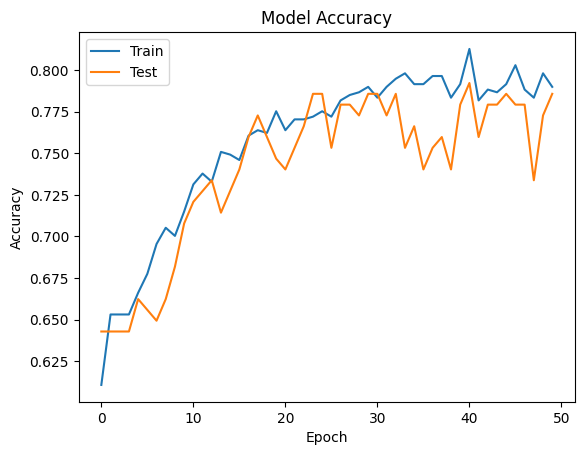

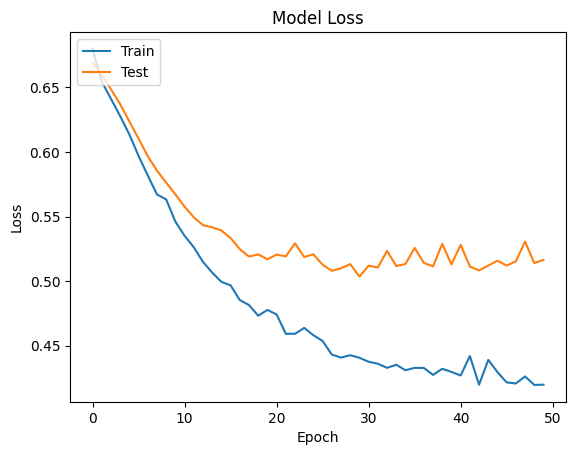

In [20]:
# -- 2. Plot accuracy and loss -- #
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()